# Reconstrucción de imágenes astronómicas utilizando archivos fits y astropy

### Jesús Salazar y Hans Sanabria

Se presenta la utilización de la biblioteca astropy para la lectura y formación de imagenes de objetos estelares mediante la reconstrucción utilizando datos en formato FITS

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [5]:
from astropy.io import fits

Los archivos fits se extraen de la base de datos https://dr12.sdss.org/fields/ , los cuales provienen del proyecto astronómico SDSS (Sloan Digital Sky Survey), que es un conjunto de telescopios.

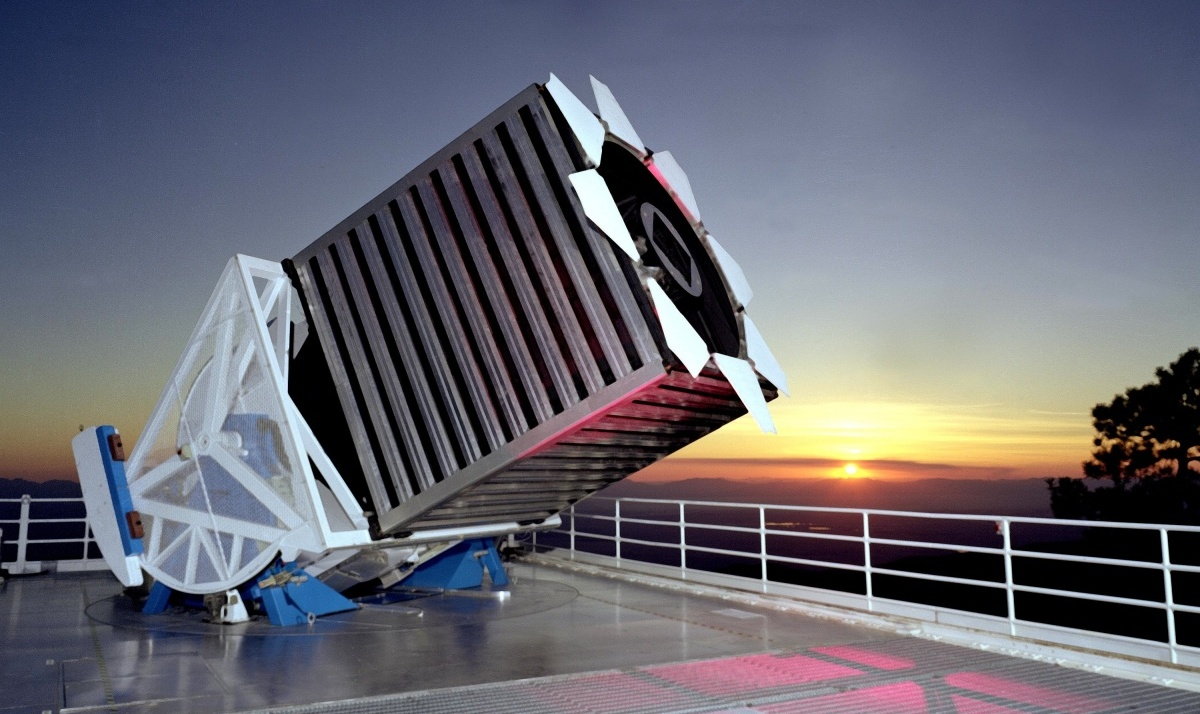

El SDSS obtiene los datos astronómicos al aplicarsele distintos filtros.

En nuestro caso se escogieron los filtros u, i y g.

El filtro u es para longitudes de onda ultravioleta.

El filtro i es para longitudes de onda del infrarrojo cercano.

El filtro g es para longitudes de onda verde.

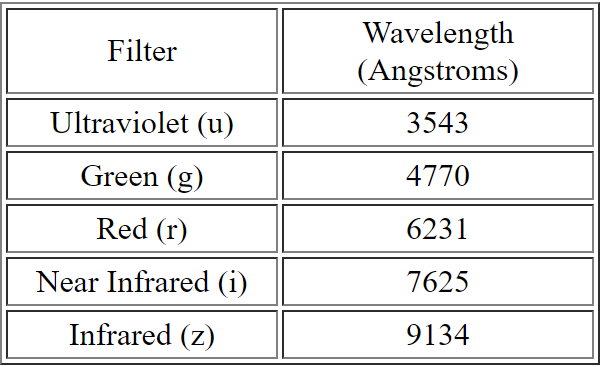

In [6]:
M73 = fits.open('frame-u-004822-3-0100.fits.bz2') #Al tener el archivo FITS este se puede abrir mediante la librería astropy

In [7]:
M73.info() # Se presenta la información del archivo FITS

Filename: frame-u-004822-3-0100.fits.bz2
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      96   (2048, 1489)   float32   
  1                1 ImageHDU         6   (2048,)   float32   
  2                1 BinTableHDU     27   1R x 3C   [49152E, 2048E, 1489E]   
  3                1 BinTableHDU     79   1R x 31C   [J, 3A, J, A, D, D, 2J, J, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, E, E]   


In [51]:
data = M73[0].data # se extrae la información presente en la posición 0 del archivo FITS

[Text(1, 4000.0, '5,000'),
 Text(1, 10000.0, '10,000'),
 Text(1, 20000.0, '20,000')]

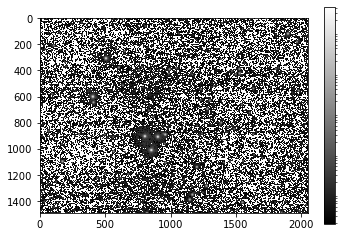

In [52]:
from  matplotlib.colors import LogNorm
#Mediante un ajuste de escala gris logaritmica se logra una primera visualización del objeto
plt.imshow(data, cmap ='gray', norm = LogNorm())
cbar = plt.colorbar(ticks=[4.e3,1.e4,2.e4])
cbar.ax.set_yticklabels(['5,000','10,000','20,000'])

In [53]:
#Tomando diferentes archivos FITS de diferente naturaleza del mismo objeto se puede reconstruir de la mejor manera
M73u = fits.open('frame-u-004822-3-0100.fits.bz2')
M73i = fits.open('frame-i-004822-3-0100.fits.bz2')
M73g = fits.open('frame-g-004822-3-0100.fits.bz2')

In [54]:
from astropy.visualization import make_lupton_rgb # los nuevos datos son relacionados a los colores rgb

In [55]:
g = M73g[0].data
i = M73i[0].data
u = M73u[0].data

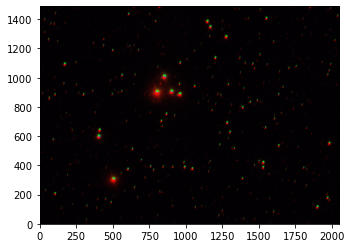

In [56]:
rgb_default = make_lupton_rgb(i, g, u,stretch=1.5,Q=10)



plt.imshow(rgb_default, origin='lower')

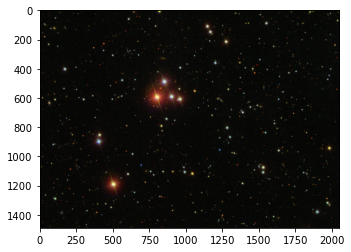

In [57]:
imgM73= mpimg.imread('M73_acuario.jpg')
plt.imshow(imgM73)

Messier 73 (M73) es una pequeña agrupación de cuatro estrellas de la constelación de Acuario. 

Al igual que este proceso se puede realizar para la visualización de grupos de estrellas se puede aplicar para la visualización de galaxias, para este caso se presentaran 2 galaxias distintas construyendo de igual forma sus imagenes a partir de datos FITS.

In [58]:
M101 = fits.open('frame-u-003712-3-0187.fits.bz2')
M104 = fits.open('frame-u-006005-6-0085.fits.bz2')

[Text(1, 4000.0, '5,000'),
 Text(1, 10000.0, '10,000'),
 Text(1, 20000.0, '20,000')]

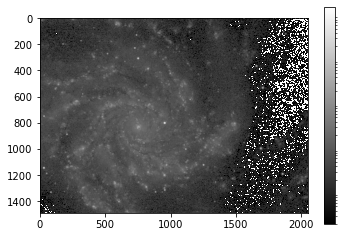

In [59]:
datos1= M101[0].data
datos2= M104[0].data

plt.imshow(datos1, cmap ='gray', norm = LogNorm())
cbar = plt.colorbar(ticks=[4.e3,1.e4,2.e4])
cbar.ax.set_yticklabels(['5,000','10,000','20,000'])


[Text(1, 4000.0, '5,000'),
 Text(1, 10000.0, '10,000'),
 Text(1, 20000.0, '20,000')]

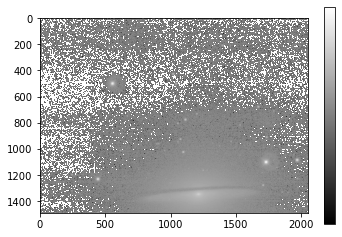

In [60]:
plt.imshow(datos2, cmap ='gray', norm = LogNorm())
cbar = plt.colorbar(ticks=[4.e3,1.e4,2.e4])
cbar.ax.set_yticklabels(['5,000','10,000','20,000'])

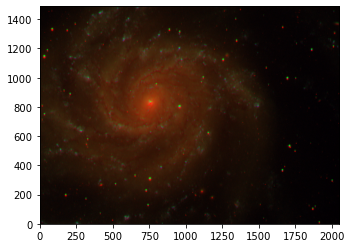

In [61]:
#Añadiendo color
M101u = fits.open('frame-u-003712-3-0187.fits.bz2')
M101i = fits.open('frame-i-003712-3-0187.fits.bz2')
M101g = fits.open('frame-g-003712-3-0187.fits.bz2')

g1= M101g[0].data
i1= M101i[0].data
u1= M101u[0].data

M101rgb = make_lupton_rgb(i1, g1, u1,stretch=1.5,Q=10)



plt.imshow(M101rgb, origin='lower')

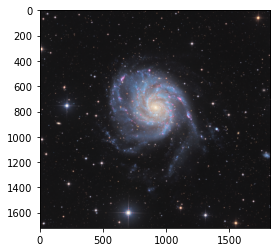

In [62]:
#Comparando con una de las imagenes de la galaxia
imgM101= mpimg.imread('M101_imagen.png')
plt.imshow(imgM101)

Galaxia M101, también conocida como Galaxia del Molinete. Ubicada a 25 millones de años luz en la constelación de Osa Mayor.

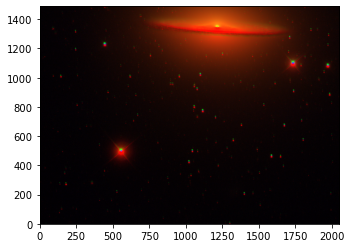

In [63]:
M104u = fits.open('frame-u-006005-6-0085.fits.bz2')
M104i = fits.open('frame-i-006005-6-0085.fits.bz2')
M104g = fits.open('frame-g-006005-6-0085.fits.bz2')

g2= M104g[0].data
i2= M104i[0].data
u2= M104u[0].data

M104rgb = make_lupton_rgb(i2, g2, u2,stretch=1.5,Q=10)



plt.imshow(M104rgb, origin='lower')

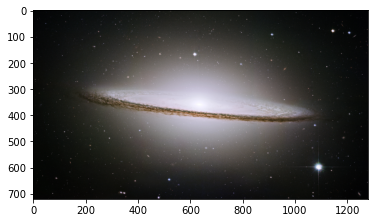

In [64]:
imgM104= mpimg.imread('M104_imagen.png')
plt.imshow(imgM104)

Galaxia M104, también conocida como Galaxia del Sombrero. Se ubica en la constelación de Virgo a una distancia de 29.35 millones de años luz.

Bibliografía:

[1]«Single Field Search — Imaging — DR12 Science Archive Server (SAS) — SDSS-III». https://dr12.sdss.org/fields/name?name=M42 (accedido 31 de mayo de 2022).

[2]«SDSS Filters». https://skyserver.sdss.org/dr1/en/proj/advanced/color/sdssfilters.asp (accedido 31 de mayo de 2022).

[3] Horizon IITM, Python for Astronomy 3: Handling FITS files using Python, (3 de mayo de 2020). Accedido: 31 de mayo de 2022. [En línea Video]. Disponible en: https://www.youtube.com/watch?v=goH9yXu4jWw
